In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

In [10]:
df= pd.read_csv("data/points_data.csv")

In [11]:
X = df.drop(['is_fire', 'date', 'geometry'], axis=1)
y = df['is_fire']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [12]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Variable': X_train.columns,
    'Importancia': model.coef_[0]
})

importances = importances.sort_values(by='Importancia', ascending=False)

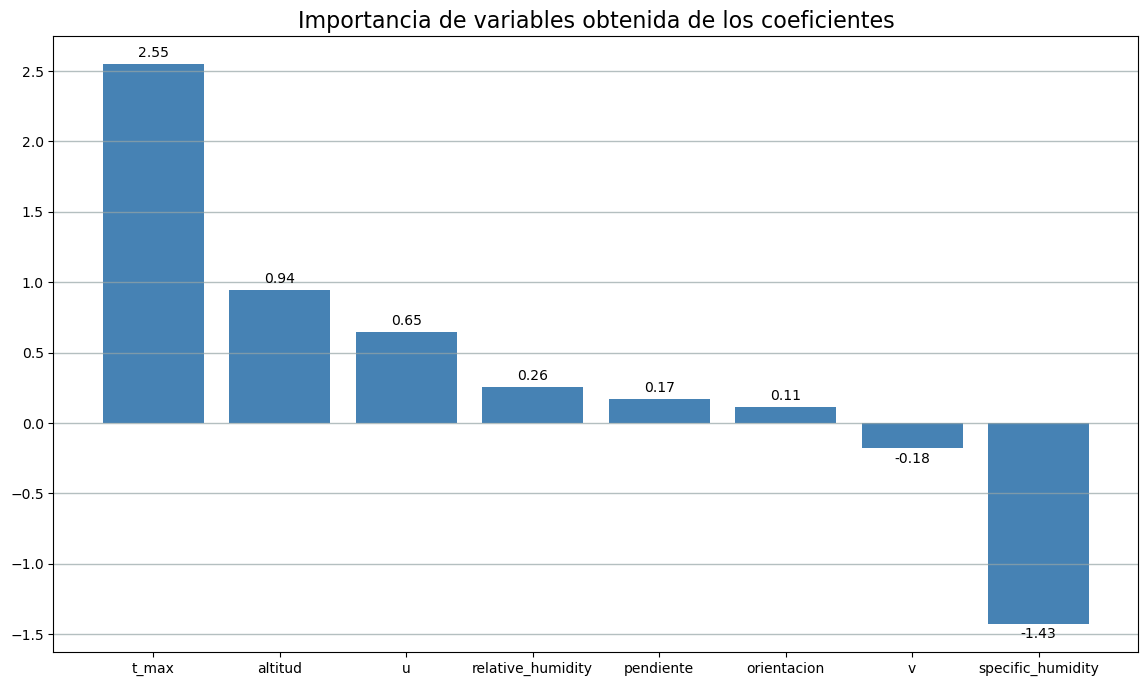

In [13]:
plt.bar(figure=plt.figure(figsize=(14, 8)), x=importances['Variable'], height=importances['Importancia'], color='steelblue')
plt.title('Importancia de variables obtenida de los coeficientes', size=16)
plt.xticks(rotation='horizontal')
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
for i, v in enumerate(list(importances['Importancia'])):
    if v>0:
        y = v+.05 
    else:
        y = v-.10
    plt.text( i , y , str(round(v,2)), color='black', horizontalalignment='center')
plt.show()

In [14]:
importances["Importancia"] = importances["Importancia"].abs()
importances = importances.sort_values(by='Importancia', ascending=False)

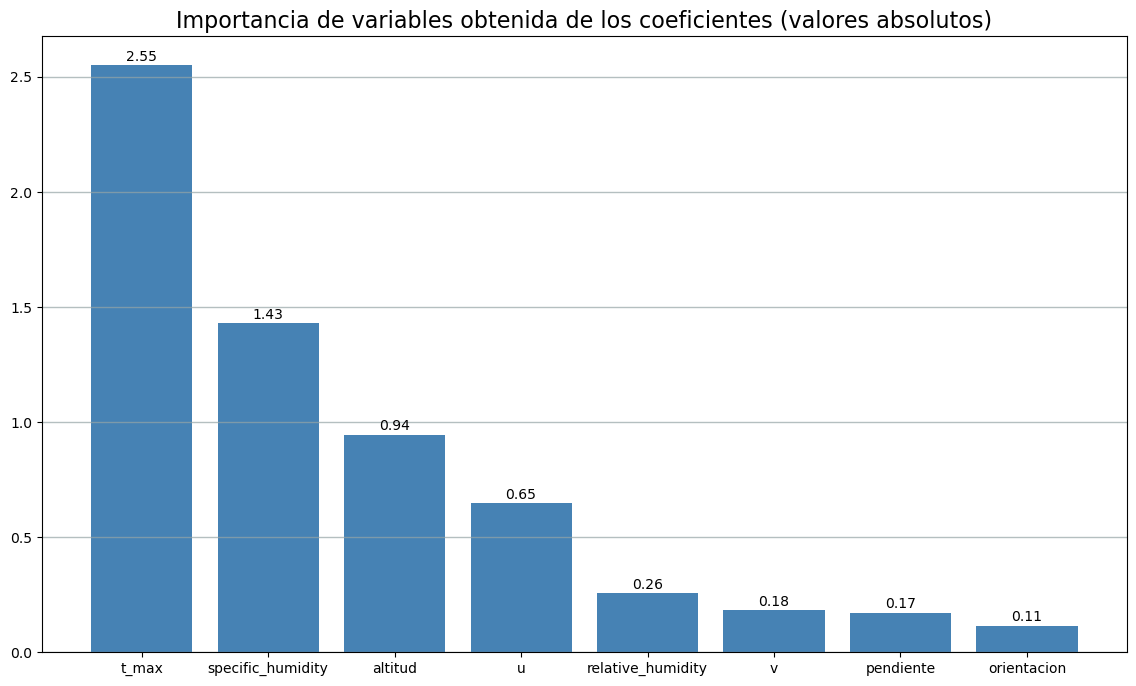

In [15]:
plt.bar(figure=plt.figure(figsize=(14, 8)), x=importances['Variable'], height=importances['Importancia'], color='steelblue')
plt.title('Importancia de variables obtenida de los coeficientes (valores absolutos)', size=16)
plt.xticks(rotation='horizontal')
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
for i, v in enumerate(list(importances['Importancia'])):
    plt.text( i , v+.02 , str(round(v,2)), color='black', horizontalalignment='center')
plt.show()